# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 09_Assignment_4.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=09_Assignment_4.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 09_Assignment_4.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [30]:
from __future__ import print_function, division
%matplotlib inline

In [31]:
# Your code goes here
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.dummy import DummyClassifier
from numpy import unravel_index
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from time import time
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import linear_model, decomposition, datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 --- [0 marks] ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [32]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 --- [5 marks] ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [33]:
# Your code goes here
print(list(newsgroups_train.target_names))
print(newsgroups_train.filenames.shape)
print(newsgroups_train.target.shape,newsgroups_train.target[:10])
print(y)
X.describe()


['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.sport.baseball', 'rec.sport.hockey']
(2845,)
(2845,) [3 3 4 1 3 0 2 4 0 3]
['rec.sport.baseball' 'rec.sport.baseball' 'rec.sport.hockey' ...,
 'comp.sys.ibm.pc.hardware' 'rec.sport.hockey' 'rec.sport.hockey']


,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,...,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,0.002436,0.002149,0.006709,0.001454,0.002286,0.003953,0.003115,0.000921,0.008366,0.001816,...,0.002612,0.006811,0.002470,0.003564,0.016934,0.008797,0.006381,0.002772,0.003288,0.001626
std,0.030224,0.020739,0.034631,0.023100,0.021634,0.030111,0.026958,0.016275,0.043921,0.026026,...,0.026988,0.039172,0.032786,0.031238,0.061181,0.039346,0.037319,0.025381,0.030929,0.022175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.723914,0.420916,0.431380,0.519765,0.443354,0.663808,0.572124,0.413233,1.000000,0.578282,...,0.723081,0.568146,0.878185,0.693531,0.650649,0.455493,0.646447,0.572455,0.703771,0.605576


*Your answer goes here*
The data are the sub-selections of the categories by passing the list of the categories in train subset to load to the sklearn.datasets.fetch_20newsgroups function. 
X is the transformed vectors of numerical values suitable for statistical analysis in order to feed predictive or clustering models with the text data and it is the extracted TF-IDF vectors which are very sparse.
y is the target of the sub-selections of the categories of the newsgroup.

### ========== Question 1.2 --- [2 marks] ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [56]:
# Your code goes here
kmeans = KMeans(n_clusters=5,random_state=0).fit(X)
kmeans.labels_
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

### ========== Question 1.3 --- [6 marks] ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [35]:
mean_data = np.mean(X.values,axis=0).reshape(-1,1)
dist=np.zeros(2845)
for i in range (2845):
    dist[i] = euclidean_distances(X[i:i+1],mean_data.T)
print('The mean distance of the model is: {}'
      .format(np.mean(dist)))
print('The inertia of the model is: {}'
      .format(kmeans.inertia_))
print('The adjusted rand index of the model is: {}'
      .format(adjusted_rand_score(kmeans.labels_,y)))


The mean distance of the model is: 0.954584949852
The inertia of the model is: 2593.26745106
The adjusted rand index of the model is: 0.236459358529


*Your answer goes here*
The value of the inertia criterion associated with the chosen partition (if compute_labels is set to True). The inertia is defined as the sum of square distances of samples to their nearest neighbor.
The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
The quality of clustering is not so good because the inertia is relatively high and the rand score are very low, that indicates the spliting is not accurate enough.

### ========== Question 1.4 --- [3 marks] ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [36]:
# Your code goes here
print('The number of datapoints with each label: {}'.format(Counter(y)))
print('The number of datapoints assigned to each cluster: {}'.format(Counter(kmeans.labels_)))

The number of datapoints with each label: Counter({'rec.sport.hockey': 600, 'rec.sport.baseball': 597, 'comp.sys.ibm.pc.hardware': 590, 'comp.sys.mac.hardware': 578, 'alt.atheism': 480})
The number of datapoints assigned to each cluster: Counter({0: 1028, 4: 688, 3: 601, 2: 307, 1: 221})


*Your answer goes here*
There is no hugh difference between the number of datapoint assigned to each label, but the distribution of the predict labels of each point use kmeans is uneven distributed and are different with target. So the distribution is not accurate enough.

### ========== Question 1.5 --- [3 marks] ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [37]:
# Your code goes here
print('Distance matrix between centre i and j:')
distance.cdist(kmeans.cluster_centers_,kmeans.cluster_centers_)

Distance matrix between centre i and j:


array([[ 0.        ,  0.34374521,  0.23330485,  0.20265703,  0.18763549],
       [ 0.34374521,  0.        ,  0.41216404,  0.4076788 ,  0.32073454],
       [ 0.23330485,  0.41216404,  0.        ,  0.29943647,  0.29271357],
       [ 0.20265703,  0.4076788 ,  0.29943647,  0.        ,  0.28842491],
       [ 0.18763549,  0.32073454,  0.29271357,  0.28842491,  0.        ]])

### ========== Question 1.6 --- [3 marks] ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

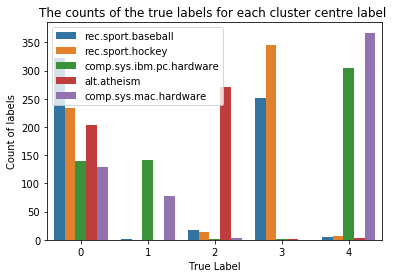

In [38]:
# Your code goes here
sns.countplot(kmeans.labels_,hue=y)
plt.xlabel('True Label')
plt.ylabel('Count of labels')
plt.title('The counts of the true labels for each cluster centre label ')
plt.show()                                                                                                               

*Your answers goes here*
That is not a good match, bucause we hope to get a label for each cluster centre but there are many labels in each cluster, so the clustering result is not good. It can split the data with huge different attribute, but can not split the similar label.

### ========== Question 1.7 --- [8 marks] ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

The inertia of the model is: [2.821432949314322, 10.564323860227185, 20.44702163048737, 49.881439843204106, 117.6487946062291, 231.10501802687304, 489.44537013552457, 801.01792700057877, 2131.6955585658325, 2593.4486358055196]
The adjusted rand index of the model is: [0.21022329338958748, 0.2696040961043118, 0.23922466417729624, 0.22522108051601281, 0.21648564852328497, 0.19628320725414433, 0.18181214810071716, 0.22078821771945242, 0.2250155382364333, 0.23147506740044421]


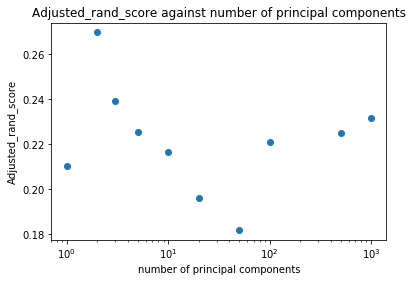

In [39]:
# Your code goes here
n_components = [1,2,3,5,10,20,50,100,500,1000]
kmeans2_in=[]
kmeans2_ars=[]
for d in n_components:
    pca = PCA(n_components = d)
    X_pca=pca.fit_transform(X)
    kmeans2=KMeans(n_clusters=5,random_state=0).fit(X_pca)
    kmeans2_in.append(kmeans2.inertia_)
    kmeans2_ars.append(adjusted_rand_score(kmeans2.labels_,y))
print('The inertia of the model is: {}'.format(kmeans2_in))
print('The adjusted rand index of the model is: {}'.format(kmeans2_ars))
plt.plot(n_components,kmeans2_ars,'o')
plt.xlabel('number of principal components')
plt.xscale("log")# logarithmic scale for the x-axis
plt.ylabel('Adjusted_rand_score')
plt.title('Adjusted_rand_score against number of principal components')
plt.show()

*Your answer goes here*
1. The graph shows the different number of principal components have the different adjusted_rand_score. When the conponent number is 2, the adjusted_rand_score peaked.
2. We cannot use inertia to choose the best number of principal components beacuse it indicates the sum of square distances of samples to their nearest neighbor and it will increase with the dimensions and small inertia may not indicate good result of clustering.
3. Dimensionality reduction could help to reduce the noise of k-means so the result is better.


### ========== Question 1.8 --- [6 marks] ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

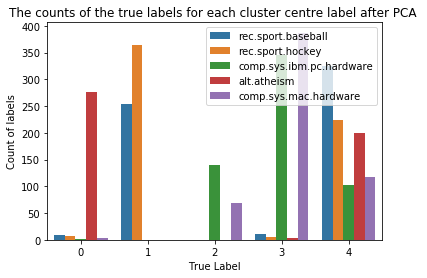

In [40]:
# Your code goes here
X_pca2 = PCA(n_components = 2,random_state=0).fit_transform(X)
kmeans_pca=KMeans(n_clusters=5,random_state=0).fit(X_pca2)
adjusted_rand_score(kmeans_pca.labels_,y)
sns.countplot(kmeans_pca.labels_,hue=y)
plt.xlabel('True Label')
plt.ylabel('Count of labels')
plt.title('The counts of the true labels for each cluster centre label after PCA ')
plt.show()                                                                                                               

*Your answer goes here*
The result is not much better than the cluster of 1000 dimention 1000 dimensional data, although the true label of 0 indicate more improvement. The The counts of the true labels for each cluster centre label after PCA, it still cannot distiguish the similar group.

### ========== Question 1.9 --- [1 mark] ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [41]:
# Your code goes here
labels_interp = cats
labels_interp = np.array(labels_interp)[kmeans_pca.labels_]
labels_interp

array(['rec.sport.hockey', 'comp.sys.ibm.pc.hardware',
       'comp.sys.ibm.pc.hardware', ..., 'comp.sys.mac.hardware',
       'comp.sys.ibm.pc.hardware', 'rec.sport.hockey'],
      dtype='|S24')

### ========== Question 1.10 --- [3 marks] ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

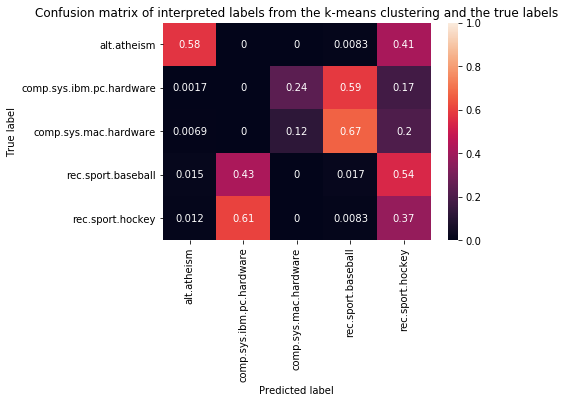

In [42]:
# Your code goes here
cm = confusion_matrix(y,labels_interp)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix of interpreted labels from the k-means clustering and the true labels'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.figure()
plot_confusion_matrix(cm_norm, classes=cats)

### ========== Question 1.11 --- [6 marks] ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

n_digits: 5, 	 n_samples 2845, 	 n_features 1000
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2.51s	2593	0.362	0.391	0.376	0.227	0.360	0.010
random   	2.77s	2593	0.378	0.406	0.392	0.240	0.377	0.007
PCA-based	0.49s	2593	0.361	0.389	0.374	0.239	0.360	0.008
__________________________________________________________________________________


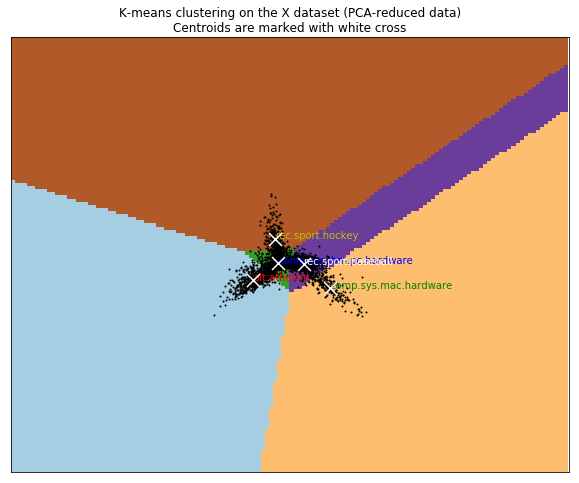

In [43]:
# Your code goes here

np.random.seed(42)
n_samples, n_features = X.shape
n_digits = len(np.unique(y))
labels = y

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(X)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=X)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=X)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits,random_state=0).fit(X)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=X)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2,random_state=0).fit_transform(X)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10, label=cats)
plt.title('K-means clustering on the X dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')

colors = ['r','b','g','w','y']
for i,center,color in zip([0, 1, 2,3,4],cats,colors):
    plt.annotate(center,(centroids[i,0],centroids[i,1]),color=color)
    i+=1
          
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


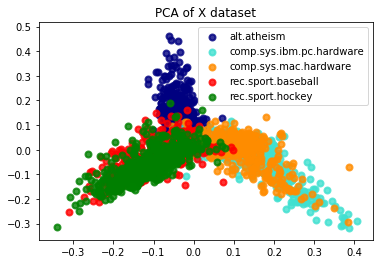

In [44]:
#create a second plot which clearly shows where the true classes lie within the pca space
plt.figure()
colors = ['navy', 'turquoise', 'darkorange','r','g']
lw = 2
target_names=cats

for color, i, target_name in zip(colors, cats, target_names):
    plt.scatter(reduced_data[y == i, 0], reduced_data[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of X dataset')
plt.show()

### ========== Question 1.12 --- [4 marks] ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

*Your answer goes here*
1. K-means starts with randomly chosen cluster centroids so to find optimal ones. Besides the initialization, the algorithm is totally deterministic.
2. yes, the n_init=10 which means the model will initialise 10 group of centers, and choose the best group from them as the final center group.
3. It is random initialiser , the problems it may bring is that it will get the local optimal solution.


## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 --- [0 marks] ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [45]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 --- [8 marks] ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. What are the max/min values for each dimension?
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots, answer this question in a markdown cell:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

In [46]:
# Your code goes here
data = pd.DataFrame(digits.data)
print(data.describe())
de = data.describe()
print('\nThe min value of each dimension is {} '.format(de.loc['min'].tolist()))
print('\nThe max value of each dimension is {} '.format(de.loc['max'].tolist()))

           0            1            2            3            4   \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                5            6            7            8            9   \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000   
mean      5.781859     1.362270     0.129661     0.005565     1.993879   
std       5.666418     3.325775     1.037383     0.094222     3.196160   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     

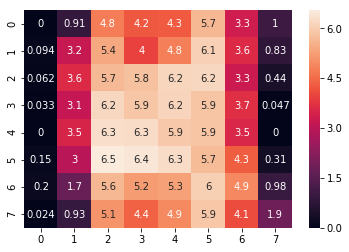

In [47]:
std = pd.DataFrame(de.loc['std'].values.reshape(8,8))
sns.heatmap(std, annot=True)

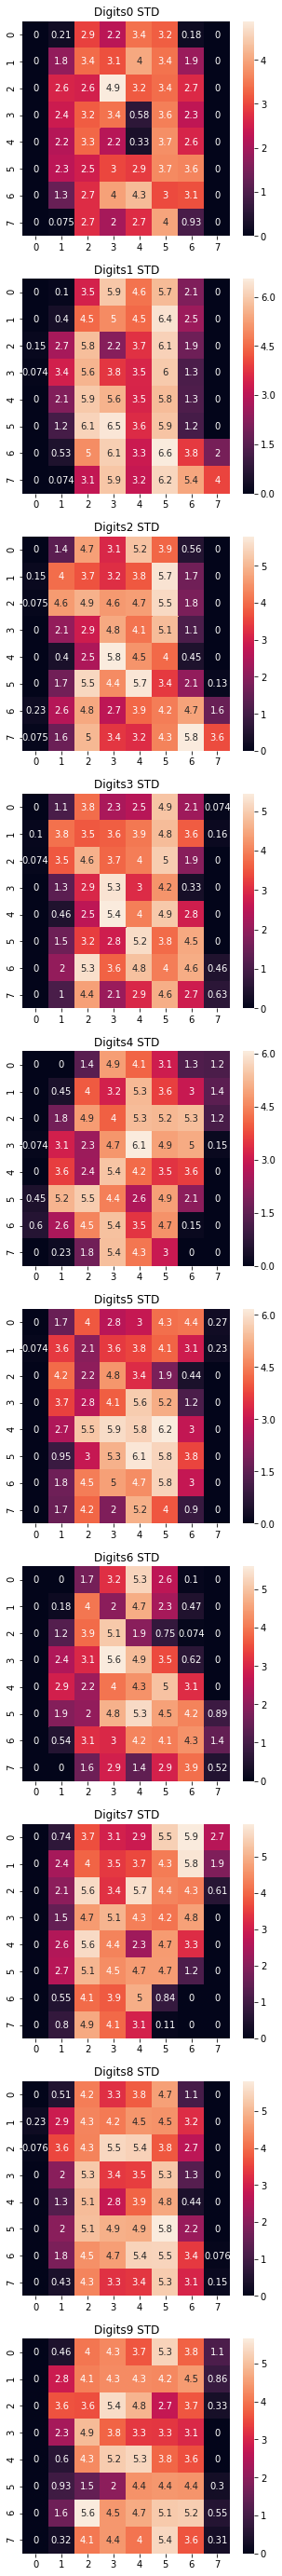

In [48]:
# produce a plot of std for each digit
data_group = data.groupby(digits.target).describe().T
index = np.linspace(2,506,64) # find the index of every std in the groupby result
std_group = pd.DataFrame(data_group.iloc[index]) # extract all std for the group result
ax = [1]*10
fig = plt.figure(figsize=(5,50))
for k in range(10):
    ax[k] = fig.add_subplot(10,1,k+1)
    img = std_group[k].values.reshape(8,8)
    ax[k] = sns.heatmap(img, annot=True)
    ax[k].set_title('Digits{} STD'.format(k))

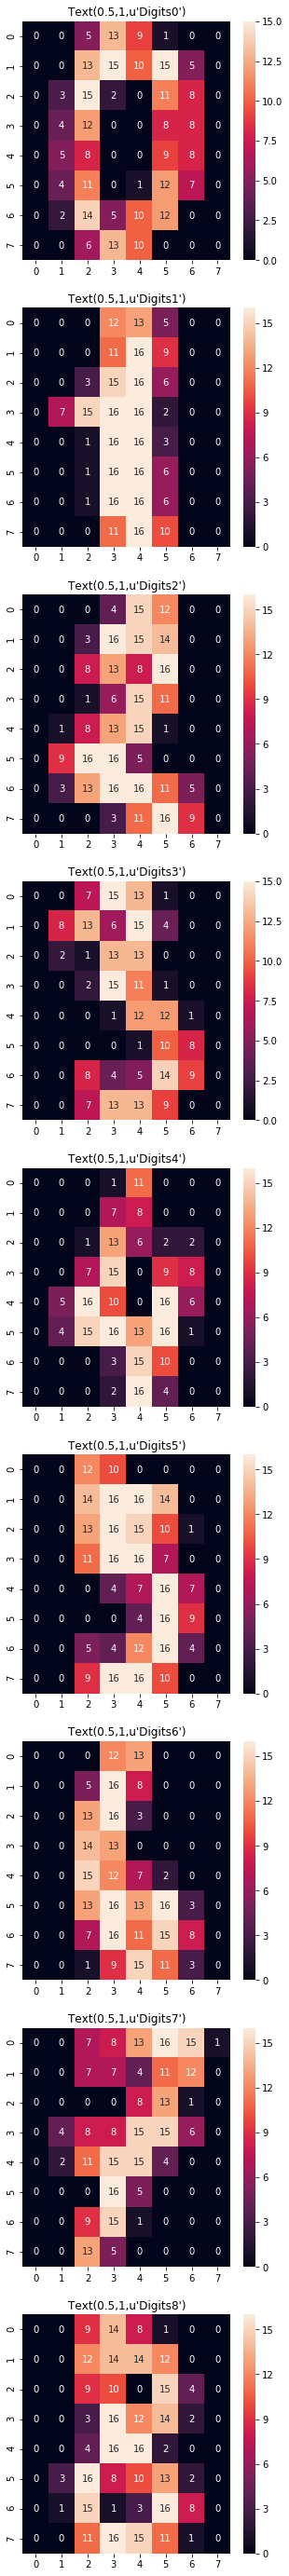

In [49]:
#sns.heatmap(data, annot=True)
ax = [1]*9
fig = plt.figure(figsize=(5,50))
for k in range(9):
    ax[k] = fig.add_subplot(9,1,k+1)
    digit = data.loc[k].values.reshape(8,8)
    ax[k] = sns.heatmap(digit, annot=True)
    ax[k].set_title(ax[k].set_title('Digits{}'.format(k)))


*Your answer goes here*
1. In fact not all dimensions are equally helpful for modeling, some of std is 0 or a small value and we cannot distinguish these dimention with others. We can using the relative probability densities under the models and add weight to each dimention.

### ========== Question 2.2 --- [10 marks] ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

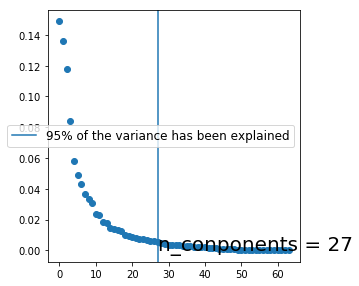

In [57]:
# Your code goes here
# Plot the PCA spectrum
pca = PCA(n_components=digits.data.shape[1],random_state=0).fit(data)
plt.figure(1, figsize=(5, 5))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, 'o')
plt.axis('tight')
#plt.vlines(np.sum(pca.explained_variance_ratio_)==0.95,colors='k', linestyles='solid')
#plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            #arrowprops=dict(facecolor='black', shrink=0.05),
            #)

plt.axvline(27, label='95% of the variance has been explained')
plt.annotate('n_conponents = 27',xy=(27,0),size=20)
plt.legend(prop=dict(size=12))
plt.show()

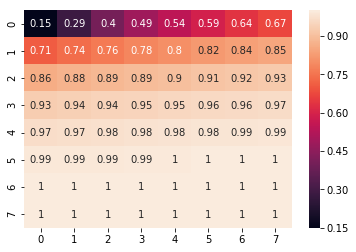

In [51]:
#Find the point where 95% of the variance has been explained.
# use a heatmap to plot the sum of variance has been explained for different n_conponent
sum_array=[]
sump=0
for i in pca.explained_variance_ratio_:
    sump=sump+i
    sum_array.append(sump)
sum_r=pd.DataFrame(sum_array) 
sum_rr = sum_r.values.reshape(8,8)
sns.heatmap(sum_rr, annot=True)
# when n_conponent= 27 the result of sum explained_variance_ratio_ is 0.95

*Your answer goes here*
1. When the number of eigenvectors used to explain that variance reach 27, 95% of the varience has been explained so the varience of the data is not significant.

### ========== Question 2.3 --- [8 marks] ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

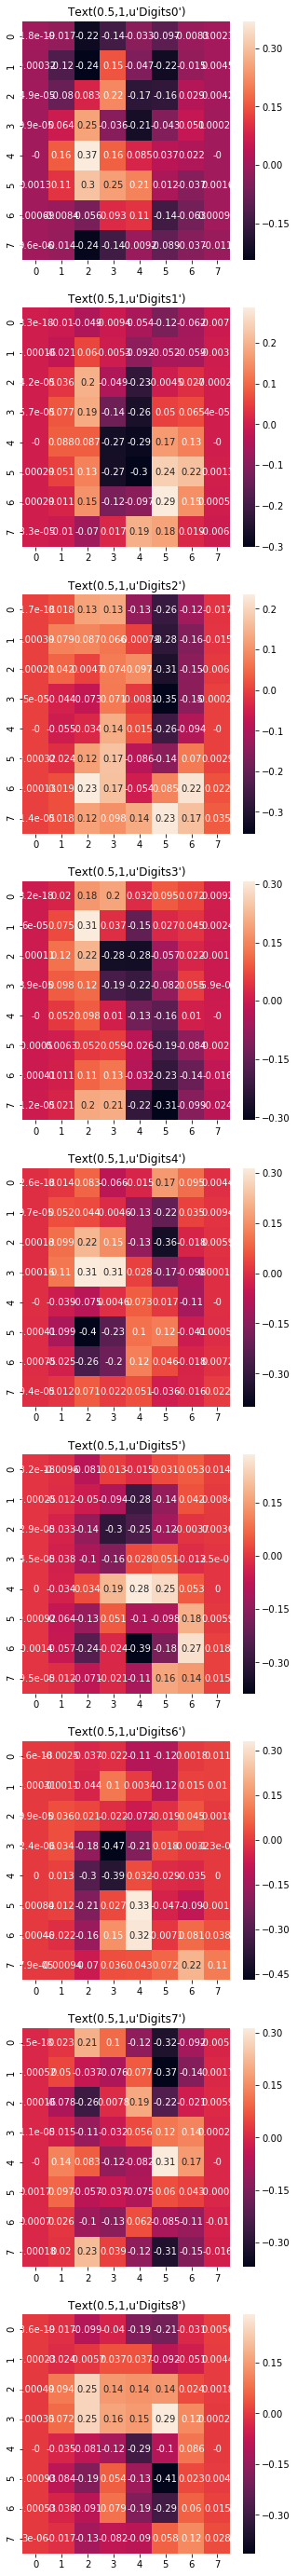

In [52]:
# Your code goes here
pca_co = pd.DataFrame(pca.components_)
#sns.heatmap(data, annot=True)
ax = [1]*9
fig = plt.figure(figsize=(5,50))
for k in range(9):
    ax[k] = fig.add_subplot(9,1,k+1)
    digit = pca_co.loc[k].values.reshape(8,8)
    ax[k] = sns.heatmap(digit, annot=True)
    ax[k].set_title(ax[k].set_title('Digits{}'.format(k)))
 

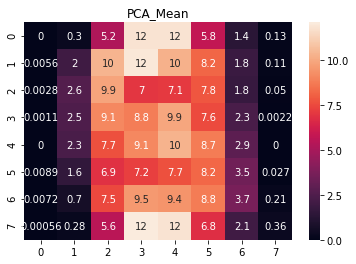

In [53]:
pca_mean = pd.DataFrame(pca.mean_)
#sns.heatmap(data, annot=True)
pca_mean = pca_mean.values.reshape(8,8)
ax = sns.heatmap(pca_mean, annot=True)
ax.set_title('PCA_Mean')   

### ========== Question 2.4 --- [10 marks] ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

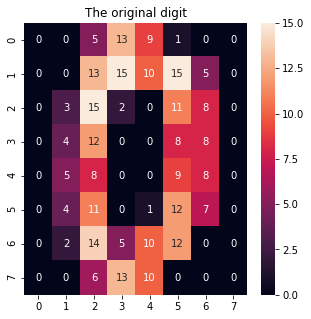

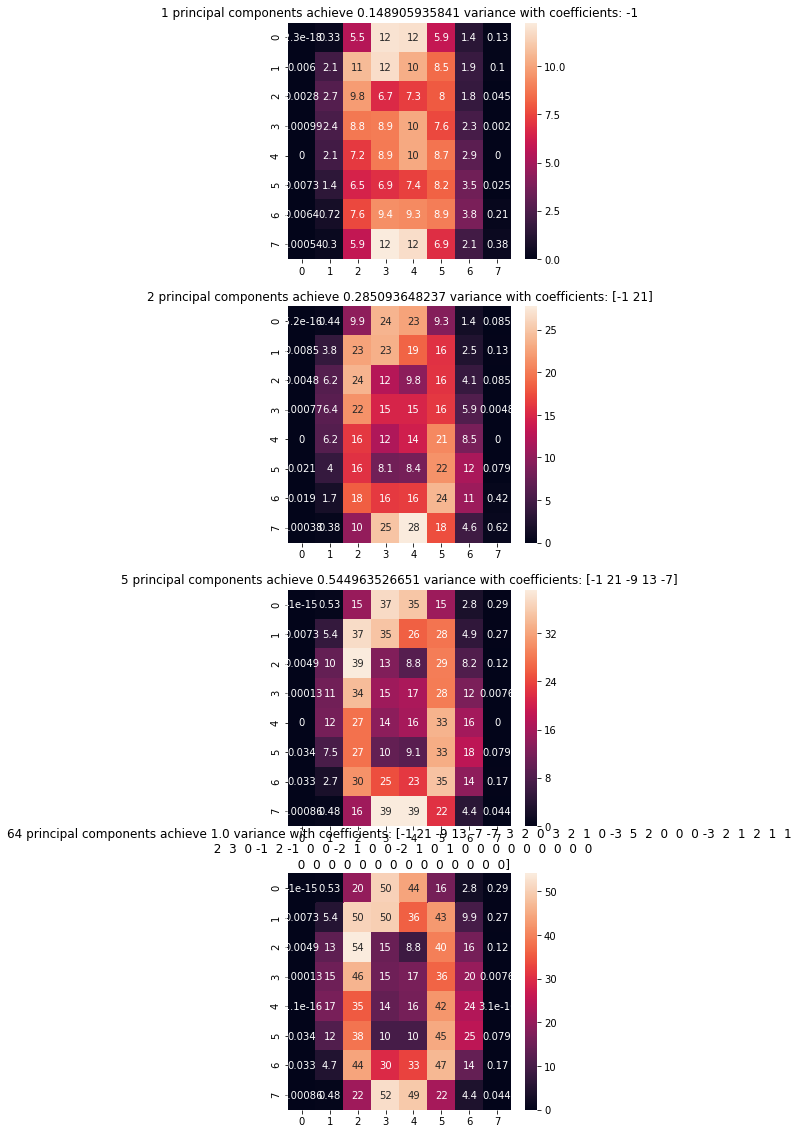

In [59]:
idx=0
recns = 0
fig1 = plt.figure(figsize=(5,5))
sns.heatmap(digits.data[idx,:].reshape(8, 8),annot=True)
plt.title('The original digit')
ax = [1]*4
fig = plt.figure(figsize=(5,20))
p_c = [1,2,5,digits.data.shape[1]]
for i,k,color in zip(p_c,range(4),['r','g','y','b']):
        pca = PCA(n_components=i,random_state=0).fit(data)
        # The coefficents to multiply each eigenvector
        coef = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()
        for ii in range (i):
            recns = np.dot(coef[ii],pca.components_[ii])+recns
        recns = recns + pca.mean_
        ax[k] = fig.add_subplot(4,1,k+1)
        # plot the variance ratio with each number of n_conponents
        ax[k]=sns.heatmap(recns.reshape(8, 8),annot=True)
        ax[k].set_title('{} principal components achieve {} variance with coefficients: {}'
                    .format(i,sum(pca.explained_variance_ratio_),
                            np.int_(pca.transform(digits.data[0,:].reshape(1, -1)).flatten())))
        

Geometrically an eigenvector, corresponding to a real nonzero eigenvalue(components), points in a direction that is stretched by the transformation and the eigenvalue is the factor by which it is stretched. So the eigenvector to some instance produce realistic data and when the number of conponents reach the number of digits.data.shape[1] it make the result more sigificant.

### ========== Question 2.5 --- [14 marks] ==========

Challenge question

Fit 4 models:

   1.SVC with a linear kernel, no shrinking, and a random_state on digit data
   
   2.SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
   
   3.Gaussian Naive Bayes Classifier on digit data
   
   4.Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component      pca above)
   
Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved when we used PCA, but the other did not!


In [55]:
# provide pca transformed digit data (use the full 64 component pca)
pca_data = PCA(n_components=digits.data.shape[1],random_state=0).fit_transform(digits.data)

# provide 4 classifiction models
svc = svm.SVC(kernel='linear',probability=True,random_state=0,shrinking=False)
svc_pca = svm.SVC(kernel='linear',probability=True,random_state=0,shrinking=False)
gau = GaussianNB()
gau_pca = GaussianNB()

# use these model to fit the original datasets
clfs =[svc,gau]
clfs_name =['svc','gau']
for i, clf in zip(clfs_name,clfs):
    scores = cross_val_score(clf, digits.data, digits.target, cv=5) 
    print('The score of the {}: is {}'.format(i,scores.mean()))
    
# use these model to fit the pca transformed datasets    
clfs2 =[svc_pca,gau_pca]
clfs_name2 =['svc_pca','gau_pca']
for i, clf in zip(clfs_name2,clfs2):
    scores = cross_val_score(clf, pca_data, digits.target, cv=5) 
    print('The score of the {}: is {}'.format(i,scores.mean()))

The score of the svc: is 0.949334872621
The score of the gau: is 0.806520755555
The score of the svc_pca: is 0.949334872621
The score of the gau_pca: is 0.835248016383


*Your answer goes here*
The Gaussian Naive Bayes classifier improved when we used PCA, but the SVC with a linear kernel did not. Because of the computational multiplication of Naïve Bayesian classification, it is very sensitive to data sparseness. So after transfering the data with pca to lower dimentions, the accuracy improved sigi